In [152]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
# Load the dataset
data = pd.read_csv('employee_dataset.csv')
(data.head())

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [155]:
# Data Exploration
unique_values = data.nunique()
('Unique values in each feature:')
(unique_values)

Name        458
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       87
College     118
Salary      309
dtype: int64

In [156]:
unique_values_length = data.apply(lambda x: len(x.unique()))
unique_values_length                                   

Name        458
Team         30
Number       53
Position      5
Age          22
Height       18
Weight       87
College     119
Salary      310
dtype: int64

In [157]:
# Statistical analysis  
data_statistics = data.describe()
(data_statistics)

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [158]:
# Renaming columns (if needed)
data =data.rename(columns={'Height': 'Joining date','College':'Place'})
data

,Name,Team,Number,Position,Age,Joining date,Weight,Place,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [159]:
# Data Cleaning
data['Age'] = data['Age'].replace(0, pd.NA)  # Replace 0 with NaN in age
data.drop_duplicates(inplace=True)  # Remove duplicate rows
data

,Name,Team,Number,Position,Age,Joining date,Weight,Place,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [160]:
# Function to detect outliers using IQR for a single column
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return (column < lower_whisker) | (column > upper_whisker)

# Detect outliers in 'age' and 'salary' columns
outliers_age = detect_outliers(data['Age'])
outliers_salary = detect_outliers(data['Salary'])
# Print the outliers
print('Outliers in Age:')
print(data[outliers_age])

print('Outliers in Salary:')
print(data[outliers_salary])

Outliers in Age:
              Name                    Team  Number Position  Age Joining date  \
298     Tim Duncan       San Antonio Spurs      21        C   40       06-Nov   
304   Andre Miller       San Antonio Spurs      24       PG   40       06-Mar   
400  Kevin Garnett  Minnesota Timberwolves      21       PF   40       06-Nov   

     Weight        Place     Salary  
298     250  Wake Forest  5250000.0  
304     200         Utah   250750.0  
400     240          NaN  8500000.0  
Outliers in Salary:
                  Name                   Team  Number Position  Age  \
23         Brook Lopez          Brooklyn Nets      11        C   28   
33     Carmelo Anthony        New York Knicks       7       SF   32   
89       Klay Thompson  Golden State Warriors      11       SG   26   
96       Blake Griffin   Los Angeles Clippers      32       PF   27   
98      DeAndre Jordan   Los Angeles Clippers       6        C   27   
100         Chris Paul   Los Angeles Clippers       3       

In [161]:
# Get data without outliers for 'age' and 'salary' columns
data_without_outliers = data[~(outliers_age | outliers_salary)]

# Print the data without outliers
('Data without outliers:')
(data_without_outliers)

,Name,Team,Number,Position,Age,Joining date,Weight,Place,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [162]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include='number')

# Calculate median for numerical columns
median_values = numerical_columns.median()

# Print median values
('Median values for numerical columns:')
(median_values)

Number         13.0
Age            26.0
Weight        220.0
Salary    2836186.0
dtype: float64

In [163]:
# Fill null values with median for numerical columns
data[numerical_columns.columns] = data[numerical_columns.columns].fillna(median_values)

# Print the data with null values filled using median
('Data with null values filled using median:')
data[numerical_columns.columns]

,Number,Age,Weight,Salary
0,0,25,180,7730337.0
1,99,25,235,6796117.0
2,30,27,205,2836186.0
3,28,22,185,1148640.0
4,8,29,231,5000000.0
...,...,...,...,...
453,8,26,203,2433333.0
454,25,24,179,900000.0
455,21,26,256,2900000.0
456,24,26,231,947276.0


In [164]:
num_rows_with_nullvalue = data[numerical_columns.columns].isnull().any(axis=1).sum()
num_rows_with_nullvalue

0

In [165]:
# data analysis


# Filter the data with age > 40 and salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]
filtered_data



,Name,Team,Number,Position,Age,Joining date,Weight,Place,Salary


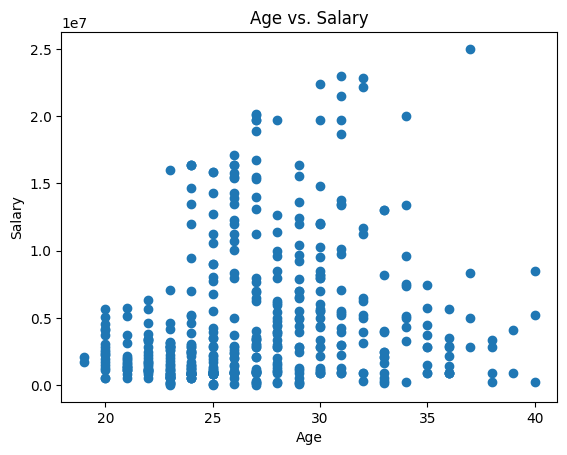

In [166]:
# Plot the chart with age and salary
plt.scatter(data['Age'], data['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()



In [167]:
# Count the number of people from each place and represent it visually
place_counts = data['Place'].value_counts()
place_counts


Place
Kentucky           22
Duke               20
Kansas             19
North Carolina     16
UCLA               15
                   ..
Utah Valley         1
Cleveland State     1
Iowa State          1
Florida State       1
Baylor              1
Name: count, Length: 118, dtype: int64

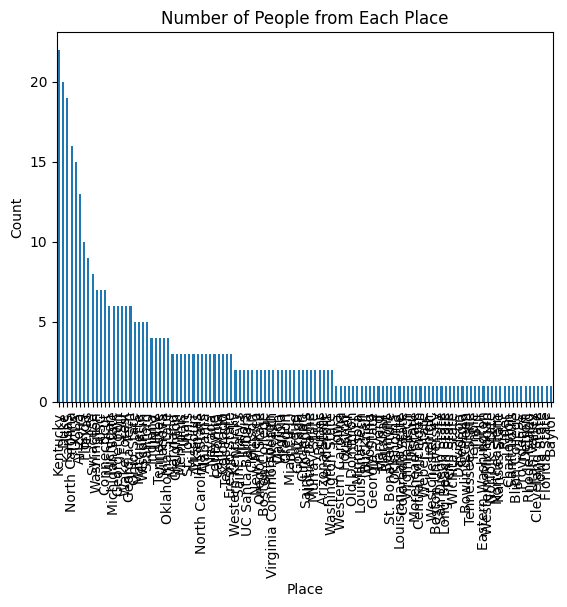

In [168]:
place_counts.plot(kind='bar', title='Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [169]:
# data encoding

categorical_columns = ['Name','Team','Position','Joining date','Place']
categorical_columns.type
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)
data_encoded

,Number,Age,Weight,Salary,Name_Aaron Brooks,Name_Aaron Gordon,Name_Aaron Harrison,Name_Adreian Payne,Name_Al Horford,Name_Al Jefferson,...,Place_Washington State,Place_Weber State,Place_Westchester CC,Place_Western Carolina,Place_Western Kentucky,Place_Western Michigan,Place_Wichita State,Place_Wisconsin,Place_Wyoming,Place_Xavier
0,0,25,180,7730337.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99,25,235,6796117.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30,27,205,2836186.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,28,22,185,1148640.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8,29,231,5000000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,8,26,203,2433333.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
454,25,24,179,900000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
455,21,26,256,2900000.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,24,26,231,947276.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your categorical data
label_encoder.fit(categorical_columns)

# Transform the categorical data
encoded_categorical_data = label_encoder.transform(categorical_columns)


data

,Name,Team,Number,Position,Age,Joining date,Weight,Place,Salary,Name_encoded,...,Salary_encoded,Name_encoded_encoded,Team_encoded_encoded,Number_encoded_encoded,Position_encoded_encoded,Age_encoded_encoded,Joining date_encoded_encoded,Weight_encoded_encoded,Place_encoded_encoded,Salary_encoded_encoded
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,2836186.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0,LabelEncoder(),...,LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()


In [190]:
encoded_categorical_data 

array([1, 4, 3, 0, 2])

In [193]:
# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Assuming 'age' and 'salary' are the features to be scaled
data_encoded[['age', 'salary']] = scaler.fit_transform(data_encoded[['Age', 'Salary']])

data_encoded[['age', 'salary']] 

,age,salary
0,-0.440127,0.569864
1,-0.440127,0.389050
2,0.014903,-0.377374
3,-1.122670,-0.703991
4,0.469932,0.041421
...,...,...
453,-0.212612,-0.455345
454,-0.667641,-0.752114
455,-0.212612,-0.365024
456,-0.212612,-0.742964
